In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')

In [194]:
df = pd.read_csv('/content/data.csv')

print('Shape:', df.shape)
df.head()

Shape: (3705, 18)


,name,country,date,trip_verified,rating,aircraft,type_of_traveller,seat_type,route,date_flown,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money,recommended
0,F Orlandino,United Kingdom,2023-12-03,Trip Verified,1.0,NaN,Family Leisure,Economy Class,Palma de Mallorca to Gatwick,December 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no
1,A Gittens,United Kingdom,2023-11-30,Trip Verified,5.0,Boeing 787-9,Solo Leisure,Economy Class,London to Johannesburg,November 2023,2.0,3.0,3.0,1.0,4.0,1.0,3,yes
2,Bert Vissers,Switzerland,2023-11-26,Trip Verified,1.0,NaN,Family Leisure,Economy Class,Zürich to Tokyo Haneda via London,July 2023,1.0,1.0,1.0,1.0,1.0,1.0,1,no
3,E Smyth,United Kingdom,2023-11-23,Trip Verified,9.0,A380,Couple Leisure,First Class,London to Miami,November 2023,5.0,5.0,5.0,5.0,4.0,2.0,4,yes
4,L Keele,Germany,2023-11-19,Trip Verified,1.0,NaN,Couple Leisure,Economy Class,London to Stuttgart,November 2023,1.0,1.0,NaN,NaN,1.0,NaN,1,no


In [195]:
df.describe()

,rating,seat_comfort,cabin_service,food_beverages,entertainment,ground_service,wifi,value_for_money
count,3698.000000,3589.000000,3578.000000,3319.000000,2564.000000,2859.000000,612.000000,3705.000000
mean,4.716333,2.868208,3.247624,2.705032,2.637676,2.783841,1.921569,2.682591
std,3.169345,1.360235,1.489935,1.436859,1.403468,1.457157,1.350417,1.469886
min,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000
75%,8.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000
max,10.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


No     2210
Yes    1495
Name: recommended, dtype: int64


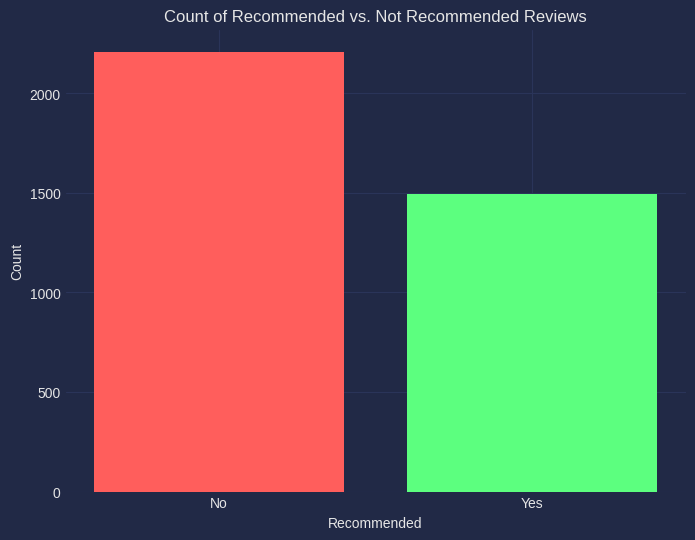

In [196]:
recommended_counts = df['recommended'].str.capitalize().value_counts()
print(recommended_counts)

# Bar chart-To visualize type of recommendations
plt.figure(figsize=(8, 6))
plt.bar(recommended_counts.index, recommended_counts.values, color=['#ff5e5c', '#5cff7f'])

# Titiles and Labels
plt.title('Count of Recommended vs. Not Recommended Reviews')
plt.xlabel('Recommended')
plt.ylabel('Count')

plt.show()

In [197]:
# Convert 'Yes' and 'No' to 1 and 0
df['recommended'] = df['recommended'].map({'Yes': 1, 'No': 0})

# Convert 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Create a new column 'combined_country' to represent the combined countries
df['combined_country'] = df['country'].apply(lambda x: x if x in ['United States', 'United Kingdom', 'Canada', 'Australia', 'Germany'] else 'Other')

# Update 'recommended' column based on 'rating'
df['recommended'] = df.apply(lambda row: 'Yes' if row['rating'] >= 5
                             and pd.isna(row['recommended'])
                             else 'No' if row['rating'] < 5
                             and pd.isna(row['recommended'])
                             else row['recommended'], axis=1)

# Create recommendation counts for the combined countries
recommendation_counts = df.groupby(['combined_country', 'recommended']).size().unstack().fillna(0)
print(recommendation_counts)

# Order countries by highest review count
order = recommendation_counts.sum(axis=1).sort_values(ascending=False).index
recommendation_counts = recommendation_counts.loc[order]

recommended         No   Yes
combined_country            
Australia           94    63
Canada              63    52
Germany             42    22
Other              291   336
United Kingdom    1206  1112
United States      261   156


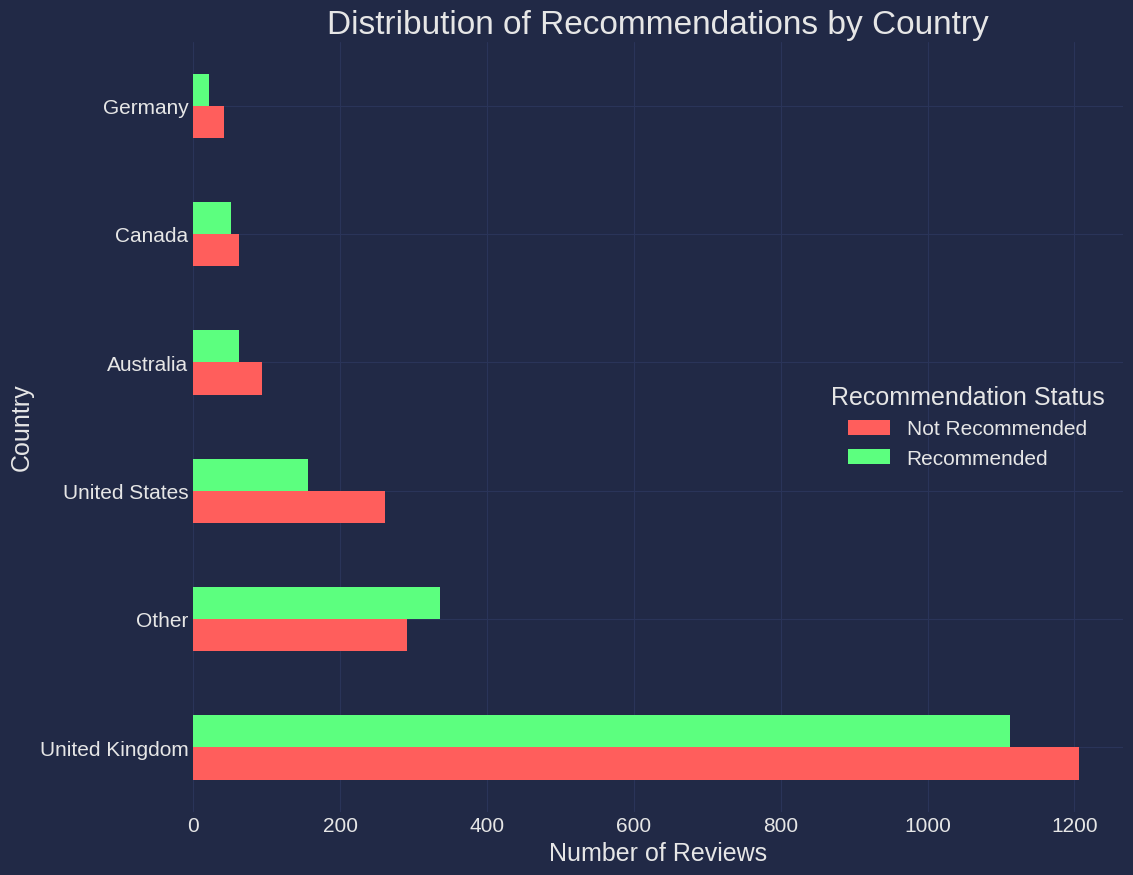

In [198]:
# Plot a horizontal bar chart with red and green bars
ax = recommendation_counts.plot(kind='barh', color=['#ff5e5c', '#5cff7f'], figsize=(12, 10))

# Set labels and title
ax.set_xlabel('Number of Reviews', fontsize=18)
ax.set_ylabel('Country', fontsize=18)
ax.set_title('Distribution of Recommendations by Country', fontsize=24)

# Set the legend title and labels, move legend to bottom left
legend_labels = ['Not Recommended', 'Recommended']
legend_title = 'Recommendation Status'
plt.legend(legend_labels, title=legend_title, loc='center right', title_fontsize=18, fontsize=15)

# Increase font size of tick labels
ax.tick_params(axis='both', labelsize=15)

plt.show()

# Drop the temporary 'combined_country' column to not affect the original DataFrame
df = df.drop('combined_country', axis=1)

In [199]:
# Filter out rows where 'aircraft' is None
df = df[df['aircraft'].notna()]

# Group similar aircraft types dynamically
df['aircraft_group'] = df['aircraft'].apply(lambda x: x if df['aircraft'].value_counts().loc[x] > 5 else 'Other')

# Create a bar chart to visualize the distribution of recommendations for each grouped aircraft type
recommendation_counts = df.groupby(['aircraft_group', 'recommended']).size().unstack().fillna(0)

# Order aircraft groups by highest review count
order = recommendation_counts.sum(axis=1).sort_values(ascending=False).index
recommendation_counts = recommendation_counts.loc[order]
print(recommendation_counts)

recommended         No  Yes
aircraft_group             
A320               176  190
Boeing 777         152  121
Other               90  161
Boeing 747-400      86   96
A380                66  101
Boeing 777-200      50   75
A319                49   60
Boeing 747          51   34
A321                36   44
Boeing 787          24   43
Boeing 767          22   19
Boeing 787-9        14   25
Boeing 777-300      17   20
A350                 8    8
Boeing 777-300ER     1   12
Boeing 787-8         4    7
A321neo              7    3
A380-800             5    4
Boeing 777-200ER     1    8
Boeing 747 400       3    5
A320-200             2    5
Boeing 787-900       2    5
Boeing 737           2    4
Boeing 787 / A320    1    5


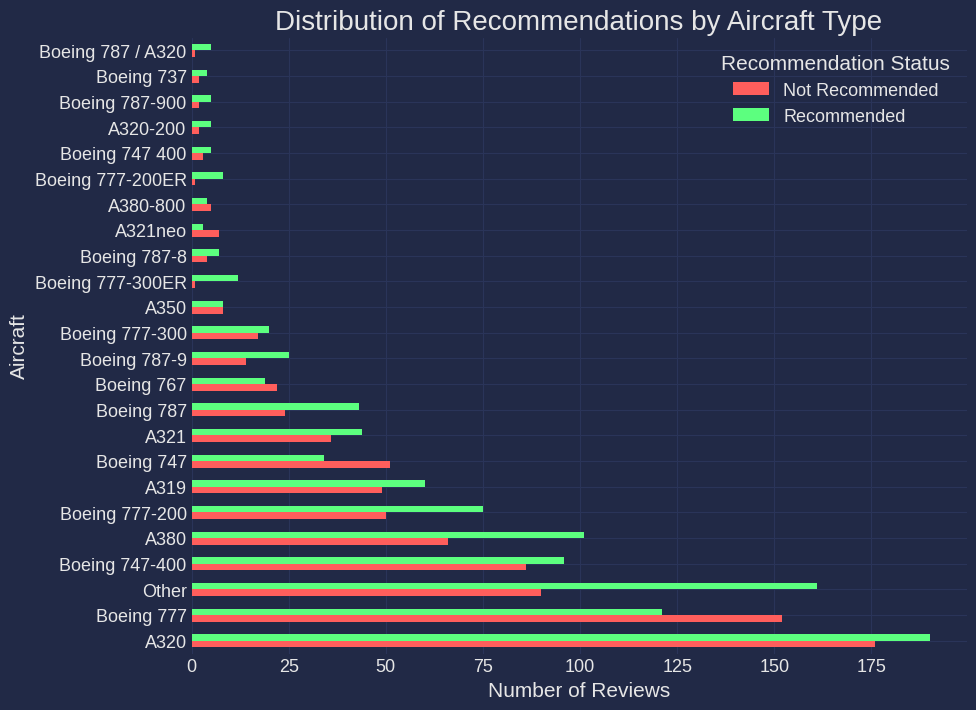

In [200]:
# Plot a horizontal bar chart with red and green bars
ax = recommendation_counts.plot(kind='barh', color=['#ff5e5c', '#5cff7f'], figsize=(10, 8))

# Set labels and title with increased font size
ax.set_xlabel('Number of Reviews', fontsize=15)
ax.set_ylabel('Aircraft', fontsize=15)
ax.set_title('Distribution of Recommendations by Aircraft Type', fontsize=20)
ax.tick_params(axis='both', labelsize=13)

# Set the legend title and labels, move legend to bottom left with increased font size
legend_labels = ['Not Recommended', 'Recommended']
legend_title = 'Recommendation Status'

plt.legend(legend_labels, title=legend_title, loc='upper right', fontsize=13, title_fontsize=15)

plt.show()

# Drop the temporary 'aircraft_group' column to not affect the original DataFrame
df = df.drop('aircraft_group', axis=1)

In [201]:
# Convert 'Yes' and 'No' to 1 and 0
df['recommended'] = df['recommended'].map({'Yes': 1, 'No': 0})

# Filter out rows where 'aircraft' is None
df = df[df['aircraft'].notna()]

# Calculate the score for each aircraft type
scores = df.groupby('aircraft')['recommended'].agg(['sum', 'count'])

# Calculate the 'score' based on the difference between 'Yes' and 'No' recommendations
scores['score'] = scores['sum'] - (scores['count'] - scores['sum'])
scores['score'] = scores['score'].clip(lower=0)  # Replace negative values with zero

# Sort by score in descending order
scores = scores.sort_values(by='score', ascending=False)

# Take the top 10 aircraft types
top_10_scores = scores.head(10)
print(top_10_scores)

                  sum  count  score
aircraft                           
A380              101    167     35
Boeing 777-200     75    125     25
Boeing 787         43     67     19
A320              190    366     14
Boeing 777-300ER   12     13     11
A319               60    109     11
Boeing 787-9       25     39     11
Boeing 747-400     96    182     10
A321               44     80      8
Boeing 777-200ER    8      9      7


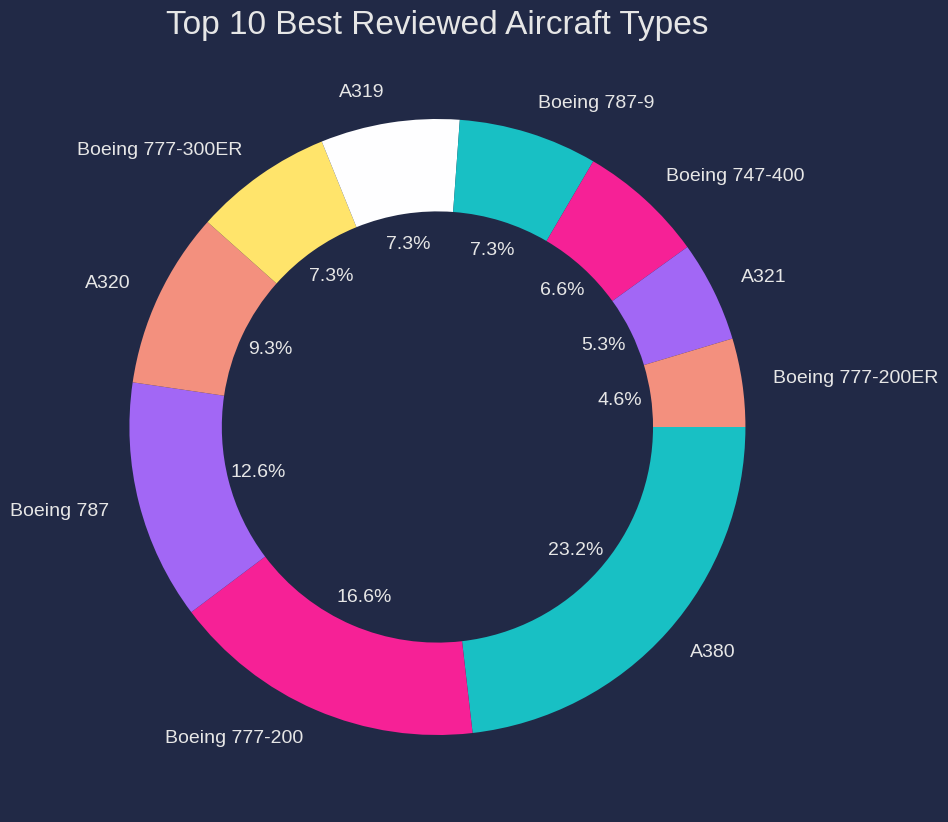

In [202]:
# Plot a pie chart for the top 10 aircraft types
fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(top_10_scores['score'], labels=top_10_scores.index, autopct='%1.1f%%', counterclock=False, wedgeprops=dict(width=0.3), textprops = {'fontsize': 14})
ax.set_title('Top 10 Best Reviewed Aircraft Types',  fontsize=24)

plt.show()